In [1]:
# Importieren der benötigten Bibliotheken

# Datenmanipulation
import pandas as pd
import numpy as np
import pickle

# Visualisierung
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Modellagnostische Interpretation
#from pdpbox import pdp

# Model Interpretation


In [ ]:
# Einlesen der Vorhersagen und Testdaten der Zielvariablen
target_test = pd.read_csv("../data/processed/target_test.csv")
target_pred_comp_lr = pd.read_csv("../data/processed/target_pred_comp_lr.csv")
target_pred_comp_rf = pd.read_csv("../data/processed/target_pred_comp_rf.csv")
target_pred_comp_dt = pd.read_csv("../data/processed/target_pred_comp_dt.csv")
target_pred_turb_lr = pd.read_csv("../data/processed/target_pred_turb_lr.csv")
target_pred_turb_rf = pd.read_csv("../data/processed/target_pred_turb_rf.csv")
target_pred_turb_dt = pd.read_csv("../data/processed/target_pred_turb_dt.csv")

In [3]:
# Ergebnisse für Kompressor-Modell
for model_name, target_pred in [("Linear Regression", target_pred_comp_lr), ("Random Forest", target_pred_comp_rf), ("Decision Tree", target_pred_comp_dt)]:
    mae = mean_absolute_error(target_test["GT_Compressor_decay_state_coefficient"], target_pred)
    mse = mean_squared_error(target_test["GT_Compressor_decay_state_coefficient"], target_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(target_test["GT_Compressor_decay_state_coefficient"], target_pred)
    print(f"{model_name} - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

Linear Regression - MAE: 0.0158, MSE: 0.0004, RMSE: 0.0193, R²: -0.7221
Random Forest - MAE: 0.0170, MSE: 0.0004, RMSE: 0.0208, R²: -0.9973
Decision Tree - MAE: 0.0170, MSE: 0.0004, RMSE: 0.0208, R²: -1.0006


In [4]:
# Ergebnisse für Turbinen-Modell
for model_name, target_pred in [("Linear Regression", target_pred_turb_lr), ("Random Forest", target_pred_turb_rf), ("Decision Tree", target_pred_turb_dt)]:
    mae = mean_absolute_error(target_test["GT_Turbine_decay_state_coefficient"], target_pred)
    mse = mean_squared_error(target_test["GT_Turbine_decay_state_coefficient"], target_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(target_test["GT_Turbine_decay_state_coefficient"], target_pred)
    print(f"{model_name} - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

Linear Regression - MAE: 0.0065, MSE: 0.0001, RMSE: 0.0075, R²: -0.0001
Random Forest - MAE: 0.0004, MSE: 0.0000, RMSE: 0.0008, R²: 0.9884
Decision Tree - MAE: 0.0005, MSE: 0.0000, RMSE: 0.0011, R²: 0.9781


In [11]:
target_test["GT_Turbine_decay_state_coefficient"]

0       0.992
1       0.997
2       0.997
3       0.991
4       0.981
        ...  
2382    0.975
2383    0.987
2384    1.000
2385    0.988
2386    1.000
Name: GT_Turbine_decay_state_coefficient, Length: 2387, dtype: float64

Text(0, 0.5, 'Vorhergesagt')

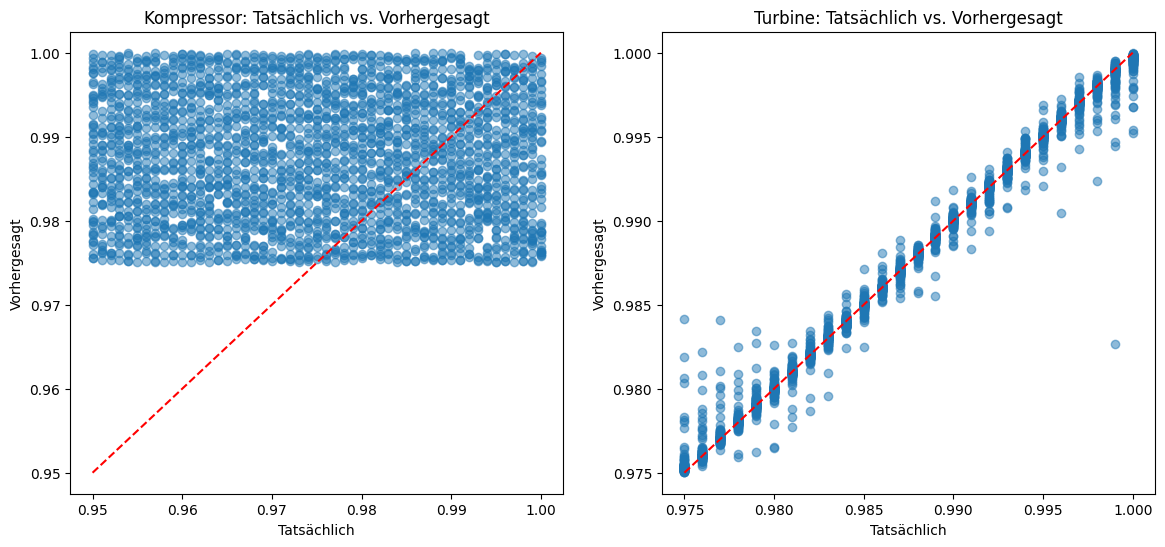

In [16]:
# Visualisieren
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Kompressor
axes[0].scatter(target_test["GT_Compressor_decay_state_coefficient"], target_pred_comp_rf, alpha=0.5)
axes[0].plot([target_test["GT_Compressor_decay_state_coefficient"].min(), target_test["GT_Compressor_decay_state_coefficient"].max()], [target_test["GT_Compressor_decay_state_coefficient"].min(), target_test["GT_Compressor_decay_state_coefficient"].max()], 'r--')
axes[0].set_title("Kompressor: Tatsächlich vs. Vorhergesagt")
axes[0].set_xlabel("Tatsächlich")
axes[0].set_ylabel("Vorhergesagt")

# Turbine
axes[1].scatter(target_test["GT_Turbine_decay_state_coefficient"], target_pred_turb_rf, alpha=0.5)
axes[1].plot([target_test["GT_Turbine_decay_state_coefficient"].min(), target_test["GT_Turbine_decay_state_coefficient"].max()], [target_test["GT_Turbine_decay_state_coefficient"].min(), target_test["GT_Turbine_decay_state_coefficient"].max()], 'r--')
axes[1].set_title("Turbine: Tatsächlich vs. Vorhergesagt")
axes[1].set_xlabel("Tatsächlich") 
axes[1].set_ylabel("Vorhergesagt")

**Feature Importance**


In [6]:
# Laden der trainierten Modelle
model_comp = pickle.load(open("../data/processed/Random_Forest_Kompressor.pkl", "rb"))
model_turb = pickle.load(open("../data/processed/Random_Forest_Turbine.pkl", "rb"))

feature_names = pd.read_csv("../data/processed/features_train.csv").columns

In [7]:
# Erstellen von DataFrames für die Feature-Wichtigkeiten
feature_importance_comp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": model_comp.named_steps['model'].feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance_turb = pd.DataFrame({
    "Feature": feature_names,
    "Importance": model_turb.named_steps['model'].feature_importances_
}).sort_values(by="Importance", ascending=False)

C:\Users\IAmBlindNotDeaf\AppData\Local\Temp\ipykernel_24208\3111024905.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_comp.head(10), ax=axes[0], palette="viridis")
C:\Users\IAmBlindNotDeaf\AppData\Local\Temp\ipykernel_24208\3111024905.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_turb.head(10), ax=axes[1], palette="viridis")


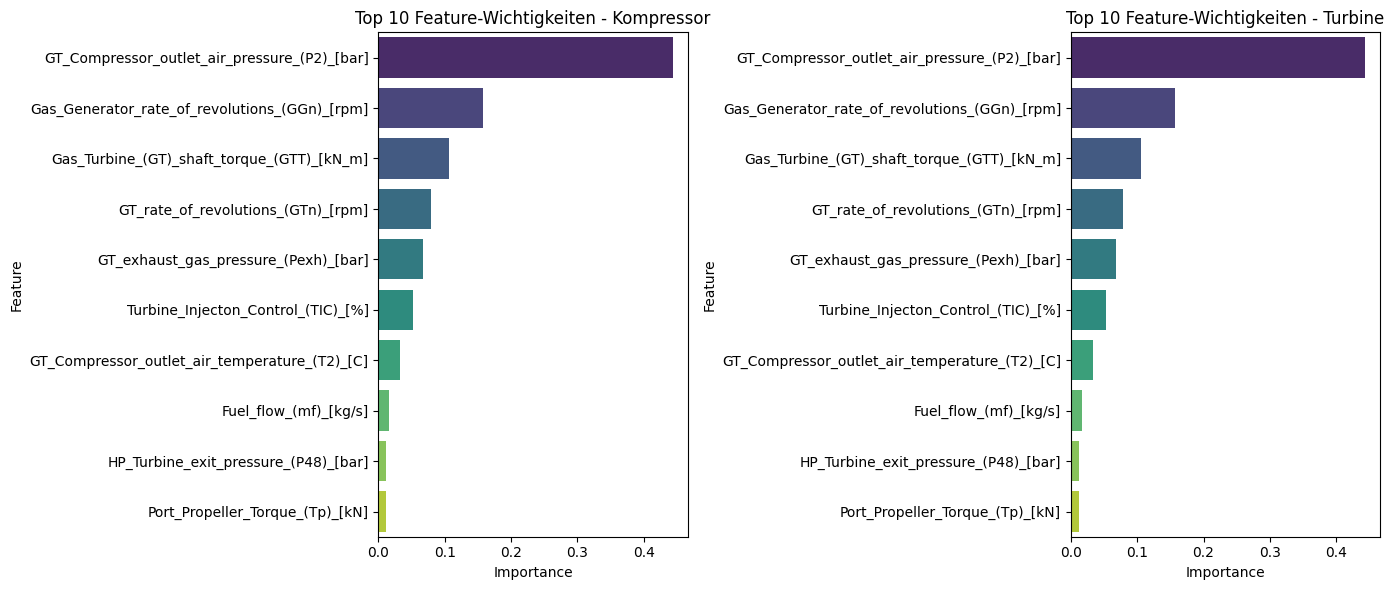

In [8]:
# Visualisierung
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_comp.head(10), ax=axes[0], palette="viridis")
axes[0].set_title("Top 10 Feature-Wichtigkeiten - Kompressor")

sns.barplot(x="Importance", y="Feature", data=feature_importance_turb.head(10), ax=axes[1], palette="viridis")
axes[1].set_title("Top 10 Feature-Wichtigkeiten - Turbine")

plt.tight_layout()
plt.show()